In [16]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns


In [17]:
df = pd.read_csv('gabungan.csv')

In [18]:
df.head(22)

,kemendagri_nama_kecamatan,jumlah_pembudidaya,jumlah_invest_perikanan,jumlah_proyek_perikanan,jumlah_tenaga_kerja_perikanan,jumlah_produksi_ikan_gurame
0,BANJARAN,2,205000000,3,3,35.0
1,BANTARUJEG,2,25000000,1,1,24.5
2,CIGASONG,1,10000000,1,1,28.0
3,CIKIJING,5,893000000,18,18,50.0
4,CINGAMBUL,1,15000000,2,2,50.6
5,DAWUAN,6,155000000,2,2,22.0
6,JATITUJUH,14,356000000,6,6,7.8
7,JATIWANGI,10,125000000,2,2,28.0
8,KADIPATEN,1,35000000,1,1,9.7
9,KERTAJATI,7,70000000,1,1,9.0


In [19]:
# Pastikan kolom benar-benar numerik
df['jumlah_invest_perikanan'] = pd.to_numeric(df['jumlah_invest_perikanan'])

# Ubah menjadi satuan juta
df['invest_juta'] = df['jumlah_invest_perikanan'] / 1000000

df[['jumlah_invest_perikanan', 'invest_juta']].head()

,jumlah_invest_perikanan,invest_juta
0,205000000,205.0
1,25000000,25.0
2,10000000,10.0
3,893000000,893.0
4,15000000,15.0


In [20]:
df['invest_juta'] = df['jumlah_invest_perikanan'] / 1000000

In [21]:
df_new = df.copy()


In [22]:
df_new = df[['kemendagri_nama_kecamatan',
              'jumlah_pembudidaya',
              'invest_juta',
              'jumlah_proyek_perikanan',
              'jumlah_tenaga_kerja_perikanan',
              'jumlah_produksi_ikan_gurame']]

In [23]:
df_new.to_csv('dataset_invest_juta.csv', index=False)

In [24]:
df_new = pd.read_csv('dataset_invest_juta.csv')

In [25]:
df_new.head()

,kemendagri_nama_kecamatan,jumlah_pembudidaya,invest_juta,jumlah_proyek_perikanan,jumlah_tenaga_kerja_perikanan,jumlah_produksi_ikan_gurame
0,BANJARAN,2,205.0,3,3,35.0
1,BANTARUJEG,2,25.0,1,1,24.5
2,CIGASONG,1,10.0,1,1,28.0
3,CIKIJING,5,893.0,18,18,50.0
4,CINGAMBUL,1,15.0,2,2,50.6


In [26]:
# Definisikan Variabel Independen (X) dan Dependen (Y)
X = df_new[['jumlah_pembudidaya', 'invest_juta', 'jumlah_proyek_perikanan', 'jumlah_tenaga_kerja_perikanan']]
Y = df_new['jumlah_produksi_ikan_gurame']

In [27]:
y_log = np.log1p(Y)

In [28]:
# Bagi data menjadi data latih (training) dan data uji (testing) dengan rasio 80:20
X_train, X_test, Y_train, Y_test = train_test_split(
    X, y_log, test_size=0.2, random_state=42)

In [29]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

y_pred = lr.predict(X_test)

print("MSE (log):", mean_squared_error(Y_test, y_pred))
print("R2  (log):", r2_score(Y_test, y_pred))

MSE (log): 0.6004210133743986
R2  (log): -0.050598150253663876


In [30]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=300,
    random_state=42
)

rf.fit(X_train, Y_train)

Y_pred_rf = rf.predict(X_test)

print("MSE RF (log):", mean_squared_error(Y_test, Y_pred_rf))
print("R2  RF (log):", r2_score(Y_test, Y_pred_rf))

MSE RF (log): 0.18127258532118565
R2  RF (log): 0.6828148272828962


In [31]:
# Data input untuk prediksi
input_data = np.array([[20, 2000000000, 10, 12]])

In [32]:
y_pred_log = rf.predict(input_data)

C:\Users\selvy\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [33]:
y_pred_asli = np.expm1(y_pred_log)

print("Prediksi produksi ikan gurame:", y_pred_asli[0])

Prediksi produksi ikan gurame: 7.1564548825748915


<Axes: ylabel='jumlah_produksi_ikan_gurame'>

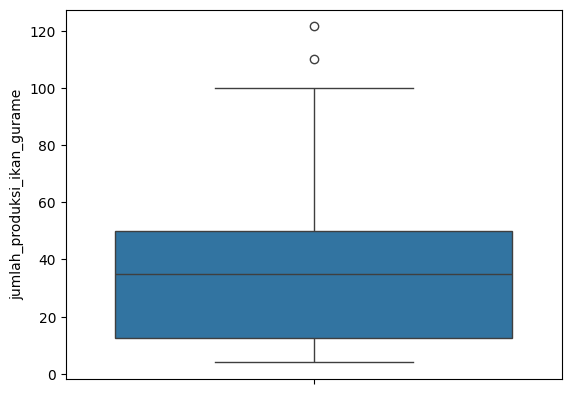

In [34]:
sns.boxplot(y=df['jumlah_produksi_ikan_gurame'])

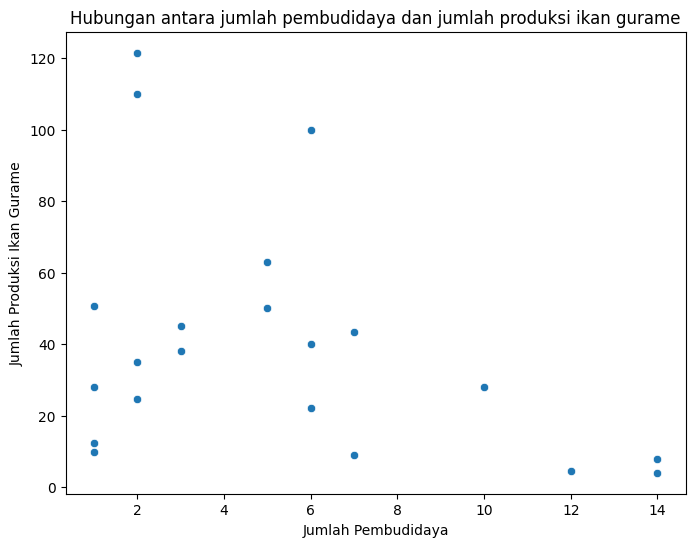

In [35]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='jumlah_pembudidaya', y='jumlah_produksi_ikan_gurame', data=df_new)
plt.title('Hubungan antara jumlah pembudidaya dan jumlah produksi ikan gurame')
plt.xlabel('Jumlah Pembudidaya')
plt.ylabel('Jumlah Produksi Ikan Gurame')
plt.show()

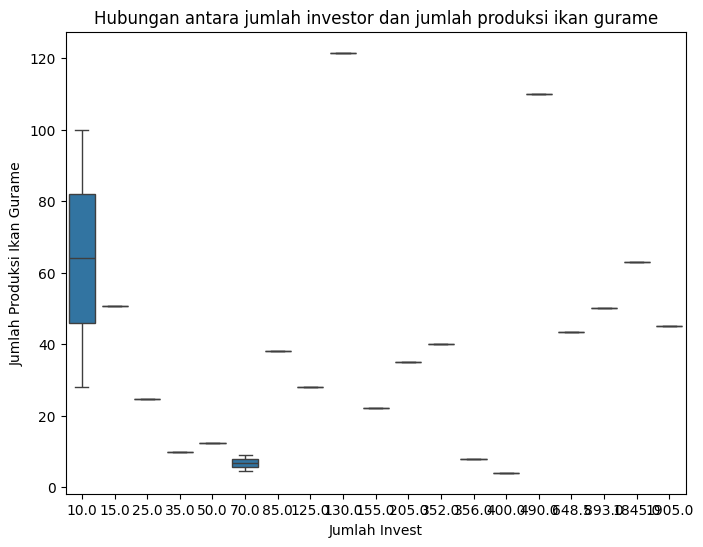

In [36]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='invest_juta', y='jumlah_produksi_ikan_gurame', data=df_new)
plt.title('Hubungan antara jumlah investor dan jumlah produksi ikan gurame')
plt.xlabel('Jumlah Invest')
plt.ylabel('Jumlah Produksi Ikan Gurame')
plt.show()

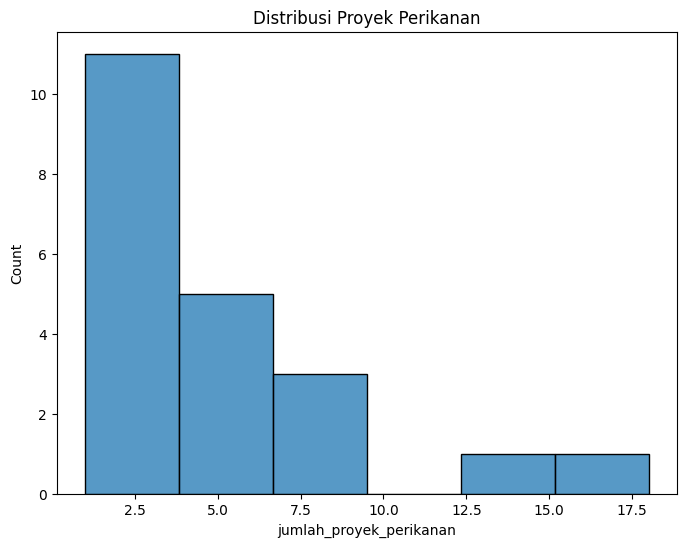

In [37]:
plt.figure(figsize=(8, 6))
sns.histplot(x='jumlah_proyek_perikanan', data=df_new)
plt.title('Distribusi Proyek Perikanan')
plt.show()

In [38]:

# Buat objek Model Regresi Linear
model = LinearRegression()

# Latih model menggunakan data latih
model.fit(X_train, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False
